<a href="https://colab.research.google.com/github/G3ntl3g1ant/sales-predictions/blob/main/Project_1_Part_3_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sales Predictions
Kai Dawson-Fischer

## Loading Data

In [67]:
import pandas as pd

In [68]:
filename = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRN2-Or8bi3tlXj1xnkNU66rebV_AuT-K5pGWjnPLcHL3QtTja1ndIvtea6TSsJHiZD3ZjO2yvxU9Z4/pub?gid=1922513210&single=true&output=csv'
# sp = sales predictions data frame
sp = pd.read_csv(filename)
sp.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [69]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Cleaning

### First to identify the infomation of the data frame itself.

1) There are **8523** Rows and **11** Columns for this Data Frame.


2) As far as specific datatypes, there are ***integers***, ***floats*** and ***objects***.

In [5]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### 3) Second, the data frame needs to be checked for any duplications

Currently there are no duplicates in this data frame.

In [6]:
sp.duplicated().sum()

0

Searching through any data frames, the first thing that must be identified is if there is any missing data, to begin:

To help organize and identify the data, the index was changed to **Item_Identifier** since each item has a ***unique identifier***.

In [7]:
sp2 = pd.read_csv(filename)
sp2.set_index('Item_Identifier', inplace=True)
sp2.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


4) Now to see if there are any missing values. 

In [8]:
sp2.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### 5) First there is missing data from the **'Item_Weight'** column, because there are so many entries missing and assuming the weight of these items could possibly taint the results, for now **'Missing'** will be the replacement variable until there is data to replace the missing information, or if it is found to be unnecessary. 

In [10]:
# What values need to be changed
sp2['Item_Weight'].fillna(aw, inplace = True)
# Checking to see what other items are missing
sp2.isna().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Now all that is left is the **'Outlet_Size'** column to fix, first the values for **'Outlet_Size'** must be identified

In [11]:
# Checking the values of the 'Outlet_Size' column
sp2['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Now that the values are stated we can plug in the average outlet size to fill in the rest of the missing data. 

First, the values are changed to an int.

In [12]:
# Values to be changed
replace_values = {'Small' : 1, 'Medium' :2, 'High': 3}
sp2['Outlet_Size'] = sp2['Outlet_Size'].replace(replace_values)
sp2['Outlet_Size'].value_counts()

2.0    2793
1.0    2388
3.0     932
Name: Outlet_Size, dtype: int64

Then, to change the missing data into the **median** for **'Outlet_Size'**

In [13]:
# Now to look for the median of the oulet sizes
# mos = median outlet size
mos = sp2['Outlet_Size'].median()
sp2['Outlet_Size'].fillna(mos, inplace=True)

And finally, change into an int.

In [14]:
sp2['Outlet_Size'] = sp2['Outlet_Size'].astype(int)
sp2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, FDA15 to DRG01
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 799.0+ KB


#### 6) Now to check the data frame once again for any missing values.

In [15]:
sp2.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Now with that out of the way, to check for needed columns and what data might be unnecessary for the data frame/data collection

In [16]:
sp2.nunique()

Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

After looking at the data as well as the key to the data, the **'Outlet_Establishment_Year'** column is unnecessary to the information we are looking for. So, it shall be removed.

In [17]:
sp2.drop(columns = {'Outlet_Establishment_Year'}, inplace=True)
sp2.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,2,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2,Tier 3,Supermarket Type2,443.4228


To finish the last bit of cleaning, it seems odd to have 5 different values for the **'Item_Fat_Content'** column when generally it should have only 2 values, but to find the truth, the values need to be checked.

In [18]:
sp2['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

So indeed it has different values stating the same thing, so the values will be replaced with the correct versions.

In [19]:
# LF changed into Low Fat
sp2['Item_Fat_Content'] = sp2['Item_Fat_Content'].replace('LF', 'Low Fat')
# reg changed into Regular
sp2['Item_Fat_Content'] = sp2['Item_Fat_Content'].replace('reg', 'Regular')
# low fat changed into Low Fat
sp2['Item_Fat_Content'] = sp2['Item_Fat_Content'].replace('low fat', 'Low Fat')
# Checking that all values were changed correctly
sp2['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

7) Finally, the break down of the finished data frame, including the breakdown for each numerical column and their respecive averages, maxs, etc, etc. 

In [20]:
sp2.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1.83,2181.29
std,4.23,0.05,62.28,0.60,1706.50
min,4.56,0.00,31.29,1.00,33.29
25%,9.31,0.03,93.83,1.00,834.25
50%,12.86,0.05,143.01,2.00,1794.33
75%,16.00,0.09,185.64,2.00,3101.30
max,21.35,0.33,266.89,3.00,13086.96


##Exploratory Visuals

Now it is time to explore the details of the DataFrame! First step is to see if there are any relationships in the DataFrame that might correlate together. Using a Heat Map will do this quite efficiently.

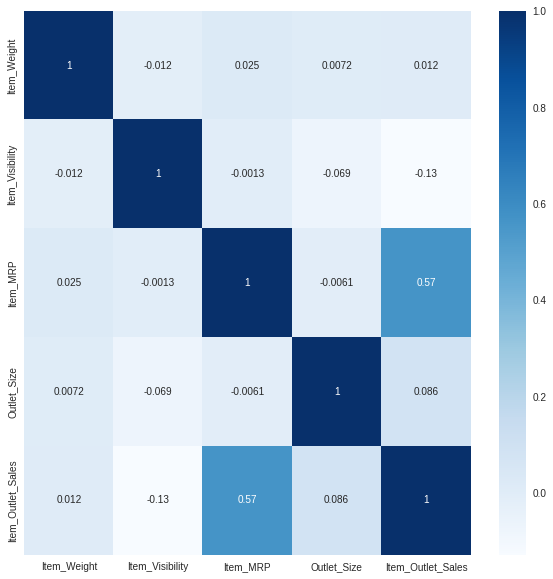

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = sp2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='Blues');

Looking through the presented HeatMap, the data in particular having to do with Item_MRP and Item_Outlet_Sales are clearly associtated with one another, especially because the number labeled for the 2 of them is 0.57.

Let us explore this information a little further.

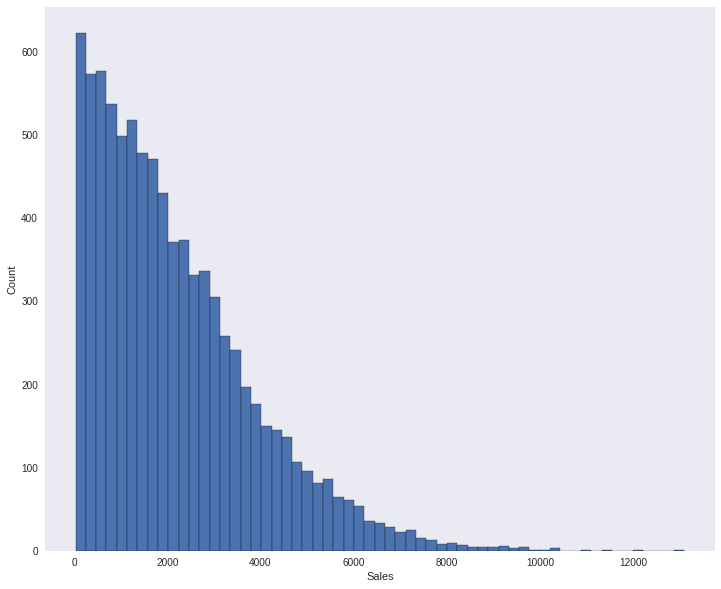

In [100]:
plt.style.use('seaborn')
plt.figure(figsize=(12,10))
sp2['Item_Outlet_Sales'].hist(bins='auto',
                              edgecolor='black',
                              grid=False);
plt.xlabel('Sales')
plt.ylabel('Count');

Analyzing this Histogram, what it shows is that for the **Outlet Sales**, there are more sales towards the lower end of sales. As the sales get higher in amount, the less often they occur. 

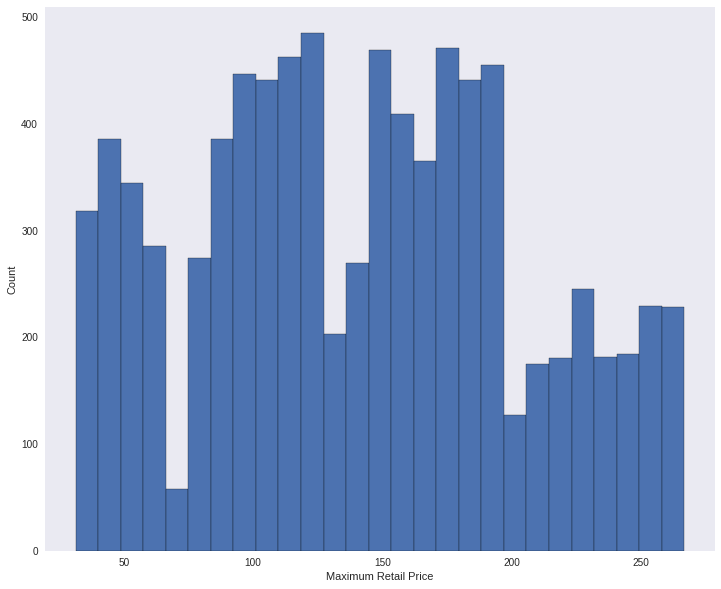

In [101]:
plt.style.use('seaborn')
plt.figure(figsize=(12,10))
sp2['Item_MRP'].hist(bins='auto',
                              edgecolor='black',
                              grid=False);
plt.xlabel('Maximum Retail Price')
plt.ylabel('Count');

As for the **Maximum Retail Price**, there appears to be 4 groupings of numbers, with the majority being the 2nd and 3rd grouping. So the majority of pricing is between **~85 - ~195**. 

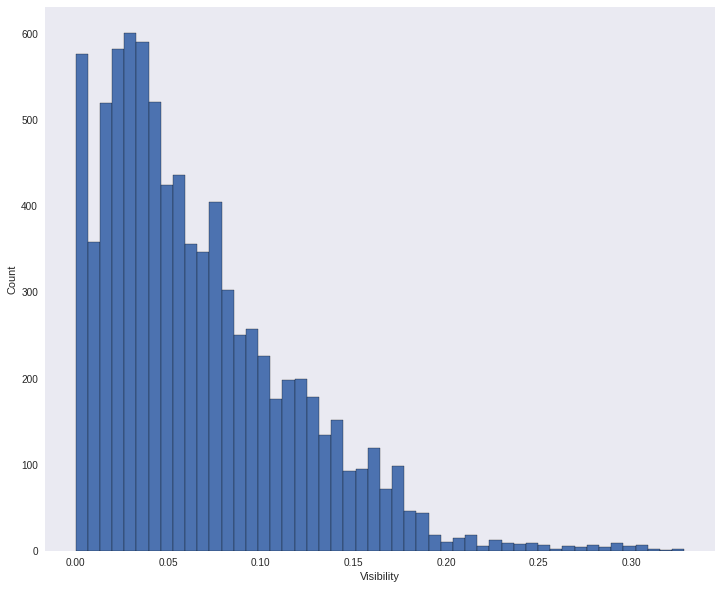

In [102]:
plt.style.use('seaborn')
plt.figure(figsize=(12,10))
sp2['Item_Visibility'].hist(bins='auto',
                              edgecolor='black',
                              grid=False)
plt.xlabel('Visibility')
plt.ylabel('Count');

Most visibility sadly lies between **~0.03 and ~0.07**, so there are a significant amount items going unseen.

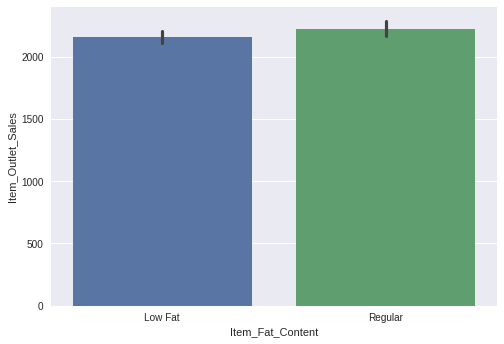

In [99]:
sns.barplot(data=sp2, x='Item_Fat_Content', y='Item_Outlet_Sales');

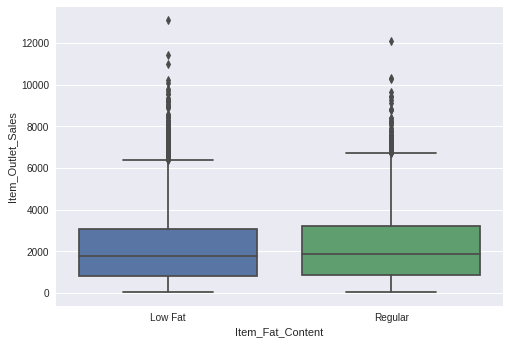

In [51]:
sns.boxplot(data=sp2, x='Item_Fat_Content', y='Item_Outlet_Sales');

Looking into these two options of **Item_Fat_Content**, there is a slight difference in sales between **Regular** and **Low Fat** items, with slightly more sales in **Regular**. 

## Explanatory Visuals